# Question 1:

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

### a.	Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

My answers to this question:

There are two reasons why we got an impossibly large AOV:

1. All orders placed by user with the id “607” have exactly 2000 items per order with an order amount of 70400. Among these orders,which are 17 in total, there are 5 pairs of records that were created at the same time. Given that the rest of orders involve no more than 8 items, we are sure there is data entry error and possible fraud issue with user 607.
 
2. All orders placed at shop 78 have a price per item of 25725 dollar. Given that for the rest stores the price is under 400, there is very likely to be data entry error for shop 78.

A better way to evaluate AOV is to use the median value to avoid the influence of abnormal orders. In this case the median order value is 284 dollar.



#### Process of Analysis
There are two factors influencing order value: "price per item" and "total items". Therefore, we need to see if there are orders involving a great number of items and/or items of high price. 

In [28]:
# Load the dataset and preview
import pandas as pd
import numpy as np
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [36]:
# Create column to calculate price per item
df['price_per_item'] = df['order_amount'] / df['total_items']

In [37]:
# Look at the distribution of each column
df.describe()

,order_id,shop_id,user_id,order_amount,total_items,price_per_item
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720,387.742800
std,1443.520003,29.006118,87.798982,41282.539349,116.32032,2441.963725
min,1.000000,1.000000,607.000000,90.000000,1.00000,90.000000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000,133.000000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000,153.000000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000,169.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000,25725.000000


We can see there are orders in which 2,000 items purchased and there are orders involving items worth 25,000 dollar. Clearly these orders are suspicious and we need to dig deep into it. But before drilling down to orders, I want to see which shops are involved with these abnormal orders.

In [56]:
# Find out the AOV，average total items, average price per item of each shops and sort the data by AOV in descending order
df.groupby('shop_id').mean()[['order_amount','total_items','price_per_item']].sort_values(by='order_amount',ascending = False)

,order_amount,total_items,price_per_item
shop_id,,,
42,235101.490196,667.901961,352.0
78,49213.043478,1.913043,25725.0
50,403.545455,2.090909,193.0
90,403.224490,2.265306,178.0
38,390.857143,2.057143,190.0
...,...,...,...
53,214.117647,1.911765,112.0
100,213.675000,1.925000,111.0
32,189.976190,1.880952,101.0


Clearly we can see shop 42 and shop 78 are suspicious. Specifically, shop 42 has orders involving large number of items, and it seems all orders of shop 78 has orders involve high price items. Now let's drill down to these suspicious orders

In [57]:
# Find out orders involving 2,000 items
order_2k = df[df['total_items'] == 2000]
order_2k

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per_item
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00,352.0
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00,352.0
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00,352.0
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00,352.0
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00,352.0
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00,352.0
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0


In [64]:
# Among these orders, to see if there exist duplicate ones
order_2k_0 = order_2k.drop('order_id',axis = 1)
order_2k_0.duplicated().value_counts()

False    12
True      5
dtype: int64

In [76]:
# It seems these orders are all placed by user 607.I would like to see if all orders of user 607 are these suspicious orders
len(order_2k) == len(df[df['user_id'] == 607])

True

These suspicious orders are all made by user 607 at shop 42 by credit card. More interestingly, 5 pairs of these orders were created at exactly the same time. Clearly, there are issues with false entry or fraud going on here.

In [65]:
# Find out orders involving 25725 dollar items
order_25k = df[df['price_per_item'] == 25725]
order_25k.head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per_item
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57,25725.0
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0
511,512,78,967,51450,2,cash,2017-03-09 7:23:14,25725.0
617,618,78,760,51450,2,cash,2017-03-18 11:18:42,25725.0
691,692,78,878,154350,6,debit,2017-03-27 22:51:43,25725.0
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45,25725.0
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26,25725.0
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21,25725.0
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20,25725.0


In [66]:
# Among these orders, to see if there exist duplicate ones
order_25k_0 = order_25k.drop('order_id',axis = 1)
order_25k_0.duplicated().value_counts()

False    46
dtype: int64

In [69]:
# See if all orders at shop 78 are of high price item
len(df[df['shop_id'] == 78]) == len(order_25k)

True

All orders created at shop 78 are for items of impossibly large price. There might be data entry error going on here


Now I would like to remove these suspicious orders and see if the rest orders look fine

In [86]:
normal_orders = df.drop(order_2k.index).drop(order_25k.index)
normal_orders.describe()

,order_id,shop_id,user_id,order_amount,total_items,price_per_item
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734,151.788536
std,1444.069407,29.061131,86.840313,160.804912,0.982821,29.034215
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000,132.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000,153.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000,352.000000


In [87]:
# See if there exist duplicate orders
normal_orders_0 = normal_orders.drop('order_id',axis = 1)
normal_orders_0.duplicated().value_counts()

False    4937
dtype: int64

We are now assured that the wrong AOV we got initially is caused by suspicious orders created by user 607 and orders of shop 78.
The rest normal orders have an average order value of 303 and a median order value of 284, which is the same as the median order value of the original dataset.Therefore, a better way to evaluate this data is to look at the median value so that we won't be misguided by abnormal orders.

### b.What metric would you report for this dataset? c. What is its value?
In order to conduct funnel analysis later for improving customer conversion rate, I need to first see the number of orders achieved per day after removing suspicious orders. Therefore, I would report average number of days achieved per day, which is 165. I will also plot the trend to see if there are any peak or bottom. 

In [132]:
# Create date column
normal_orders['date'] = normal_orders['created_at'].apply(lambda x: x[5:10])
# Explore statistics of number of orders per day
normal_orders.groupby('date').count()[['order_id']].describe()

,order_id
count,30.000000
mean,164.566667
std,14.698542
min,138.000000
25%,155.250000
50%,164.500000
75%,171.750000
max,197.000000


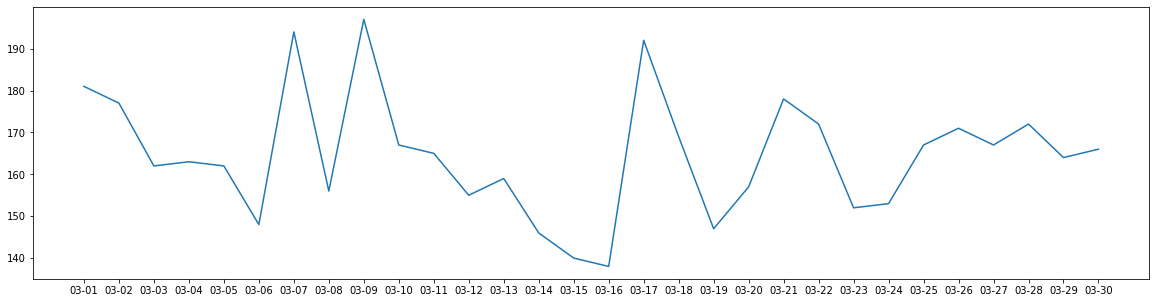

In [133]:
# plot the trend of number of orders
import matplotlib.pyplot as plt
plt.figure(figsize = (20,5))
plt.plot(normal_orders.groupby('date').count()[['order_id']])

It seems we have three peaks: 03-07, 03-09, and 03-17. However, give that the gap between the peak and the bottom is about 60 when we have 100 shops in total, there isn't a very obvious peak moment.

# Question 2

### a.	How many orders were shipped by Speedy Express in total? 
54

In [ ]:
SELECT Count(*) FROM orders
JOIN shippers
USING (shipperid)
WHERE shippername = 'Speedy Express'

### b. What is the last name of the employee with the most orders?
Peacock

In [ ]:
SELECT DISTINCT lastname FROM employees
JOIN orders 
USING (employeeid)
WHERE employeeid =
(
    SELECT employeeid FROM orders
    GROUP BY employeeid
    ORDER BY count(*) desc
    LIMIT 1
)

### c.	What product was ordered the most by customers in Germany?
Gorgonzola Telino (most orders in Germany are to buy Gorgonzola Telino, but in terms of total quantity sold the answer would be Boston Crab Meat)

In [ ]:
SELECT productname FROM orders
JOIN orderdetails
USING (orderid)
JOIN products
USING (productid)
JOIN customers 
USING (customerid)
WHERE country = 'Germany'
GROUP BY productname
ORDER BY Count(*) desc  
LIMIT 1

# To rank by total quantity sold, order by “sum(quantity)”